# Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
#from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline

## Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

Text(0, 0.5, 'test scores')

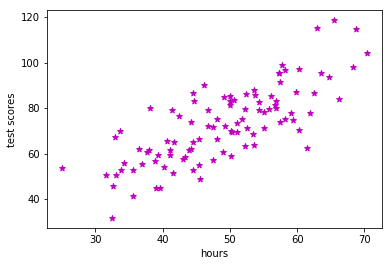

In [2]:
points = np.genfromtxt('data_students_hours.csv', delimiter=',')

#Extract columns

hours = points[:,0]

scores = points[:,1]

#Plot the dataset

plt.scatter(hours,scores,marker='*',color = 'm');

plt.xlabel('hours')

plt.ylabel('test scores')


### Define model, create prediction

In [9]:
model, lin_mod = LinearRegression(), LinearRegression()

In [10]:
cross_val_predict?

In [11]:
ypred = cross_val_predict(model, hours.reshape(-1,1), scores, cv=5)

In [5]:
ypred

array([ 52.13010302,  79.8018331 ,  90.51844763,  71.93166467,
        88.24758767,  82.0703579 ,  78.19503622,  61.11914684,
        72.76402282,  78.64231518,  69.21280952,  81.02488359,
        67.55222387,  86.0724909 ,  84.16648073,  73.88923257,
        68.24406376,  88.88781497,  69.47586455,  60.48073107,
        95.31451632,  94.30671091,  70.94711813,  63.25529637,
        76.63106837,  86.43298133,  83.74882724,  91.96162629,
        69.9786156 ,  74.95293134,  77.12445591,  55.43030153,
        64.37650715,  84.8618355 ,  84.00208492,  68.28919668,
        89.72223961,  52.20799328,  56.56107912,  58.17567984,
        66.52592968,  64.91412074,  73.71337877,  65.63361636,
        90.54933229,  51.04183339,  60.80895419,  78.27518889,
        52.59872949,  92.77642722,  58.14232114,  66.45679735,
        61.37253417,  62.83299048,  75.03621095,  80.23310372,
        62.38624508,  89.89437894,  72.58103512,  62.02796101,
        62.72866651,  74.63258804,  77.53052109,  74.56

### Calculate performance metrics; fit model and find coefficients of best fit line

In [6]:
metrics.r2_score(scores,ypred)

0.5782980814154778

In [ ]:
model.fit?

In [7]:
model.fit(hours.reshape(-1,1),scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.coef_, model.intercept_

(array([1.32243102]), 7.991020982270399)

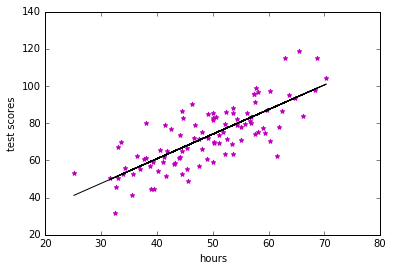

In [9]:
#Plot the dataset + line

plt.scatter(hours,scores,marker='*',color = 'm');

plt.plot(hours, model.coef_*hours + model.intercept_, color = 'k')

plt.xlabel('hours')

plt.ylabel('test scores')


### Opening the box: Gradient Descent

The goal of this project was to build a linear regression model from the ground up using numpy. The code comes from

https://github.com/mattnedrich/GradientDescentExample/blob/master/gradient_descent_example.py

and

https://github.com/philippbauch/simple-linear-regression-notebook

## Define cost function


In [14]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

## Define Gradient Descent functions


In [28]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
#        print(m_gradient, b_gradient)
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient 

    #Return updated parameters
    return b_updated, m_updated

### Defining the hyperparameters

In [23]:
#hyperparameters

learning_rate = 0.01
initial_b = 7
initial_m = 1
num_iterations = 500

## Run gradient_descent_runner() to get optimized parameters b and m


In [27]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

5.067336268302512 0.1559067884576622
-3.8557862306552586 -0.011109050509615637
3.4884474336070106 0.10825046404419722
-12.720678422950183 -0.23316938793143635
-37.14566176181086 -0.6415237332149377
-54.86762205486154 -0.9629103303520459
-76.20154634223782 -1.3715138575039407
-86.31876597794954 -1.6289523100549896
-105.77841044562504 -2.033476322160886
-118.12857342168395 -2.2684936310432167
-120.62297685722706 -2.323412571062924
-143.5889469763738 -2.745956808588304
-153.1680177970737 -2.9628542835673533
-165.0627716986416 -3.1673422777500964
-185.1543962110737 -3.521521959785737
-189.8225495942531 -3.6168762372773418
-217.71210358855285 -4.240982387276798
-253.99007471797876 -4.84263378749345
-250.54906912623568 -4.767203978381435
-259.13565632208196 -4.9884118913578925
-273.28538179617965 -5.202186852514896
-333.69732218502475 -6.125690163662664
-336.32836122400556 -6.181102380750686
-338.6699857834666 -6.237424409997592
-355.81567100420375 -6.568133705191051
-365.7837256914333 -6.73

1.3517711083855778e+25 2.6573320429128265e+23
1.3637923106153563e+25 2.6845221099705446e+23
1.3726760701348117e+25 2.7078970486572186e+23
1.3793502595427813e+25 2.7281584092069008e+23
1.3970779398602963e+25 2.7611759897075846e+23
1.4261548269437684e+25 2.8034599664473155e+23
1.439298906249142e+25 2.8318912978707115e+23
1.4679995832031242e+25 2.8739008784789555e+23
1.4833922632567454e+25 2.9046676712327002e+23
1.498302512273945e+25 2.9349485812114758e+23
1.5137009768763073e+25 2.965721153346907e+23
1.5279585926683183e+25 2.995332072507186e+23
1.5318432416819996e+25 3.010791218047129e+23
-3.173464273613599e+24 -9.763800880535672e+22
-1.1746207179027772e+25 -2.5809572400155188e+23
-2.311617559076465e+25 -4.4288204373984455e+23
-2.988577666643314e+25 -5.854730889104778e+23
-4.063008703016949e+25 -7.651041561352284e+23
-4.9762056177653715e+25 -9.307118226088903e+23
-5.7949388171108436e+25 -1.0875218255612623e+24
-6.258849464403445e+25 -1.2055665487769219e+24
-6.953874209245123e+25 -1.350047

-5.613461079761487e+46 -1.0705072558841928e+45
-5.686892509684535e+46 -1.0906607883120782e+45
-5.76540419267276e+46 -1.111499625295323e+45
-5.875199165687815e+46 -1.1361418593482348e+45
-5.97898202480626e+46 -1.1601000711731192e+45
-6.117646862863338e+46 -1.1877925271405074e+45
-6.224092554622761e+46 -1.2120560797423936e+45
-6.443558936193267e+46 -1.2468934064047032e+45
-6.502595383523647e+46 -1.2649644732402738e+45
-6.591830384212054e+46 -1.2871805274766417e+45
-6.750564792279258e+46 -1.3168089322089278e+45
-6.813998511884962e+46 -1.3355407172683388e+45
-7.045536604419188e+46 -1.3713231822802638e+45
-7.12590990499992e+46 -1.3924075662281483e+45
-7.235443537136644e+46 -1.4170204617842655e+45
-7.326610723272543e+46 -1.4394756890512306e+45
-7.422881259935056e+46 -1.4625507072604885e+45
-7.567226279854935e+46 -1.490804549006055e+45
-7.734990348427367e+46 -1.5212638569788703e+45
-7.829685045054826e+46 -1.5441492846128897e+45
-8.045662822447746e+46 -1.5787086610534702e+45
-8.179555998562759

-2.2384850052557788e+67 -4.400447601776494e+65
-2.2583916897303747e+67 -4.445473388333873e+65
-2.2731028803685216e+67 -4.484181457639619e+65
-2.2841551012802555e+67 -4.5177335519958235e+65
-2.313511511047083e+67 -4.572409494100309e+65
-2.3616618046375434e+67 -4.642430259677638e+65
-2.3834279337184583e+67 -4.689511535994261e+65
-2.4309552366794662e+67 -4.759077911311269e+65
-2.4564449688367704e+67 -4.81002662874711e+65
-2.4811358123106277e+67 -4.860170741542909e+65
-2.5066351234754568e+67 -4.911129029429816e+65
-2.530245229478707e+67 -4.960163661196201e+65
-2.5366780704485014e+67 -4.98576345784118e+65
5.255144267495835e+66 1.6168507915134434e+65
1.9451302425219056e+67 4.273973637357196e+65
3.8279566797803273e+67 7.333969544538408e+65
4.9489786046789387e+67 9.695226672451271e+65
6.728198288532234e+67 1.2669853426687254e+66
8.240419986295511e+67 1.541225763888729e+66
9.596213122182808e+67 1.8008975663895376e+66
1.0364432698190185e+68 1.9963754407342605e+66
1.1515369021624348e+68 2.2356302

9.19537204941537e+88 1.7424081224424112e+87
9.295692426538233e+88 1.7727220425477203e+87
9.417292269719928e+88 1.8060955773591254e+87
9.547304831770047e+88 1.8406039522049776e+87
9.729121412418966e+88 1.8814106176835184e+87
9.900982145717716e+88 1.921084566616186e+87
1.0130606198799972e+89 1.966942291387163e+87
1.0306876488495778e+89 2.0071218738154514e+87
1.0670305031431607e+89 2.064811251013276e+87
1.076806729406086e+89 2.0947362966733446e+87
1.0915837289843321e+89 2.1315252944375087e+87
1.11786958389515e+89 2.180588881690887e+87
1.1283739828487977e+89 2.211608053292538e+87
1.1667158696570156e+89 2.270862546071234e+87
1.1800254031317884e+89 2.3057775379804506e+87
1.198163784074261e+89 2.346535619948999e+87
1.213260746708734e+89 2.38372067976785e+87
1.2292028060877316e+89 2.421932091401819e+87
1.2531058293636094e+89 2.4687194511078975e+87
1.2808869640239437e+89 2.519158984653666e+87
1.29656806988298e+89 2.557056441020226e+87
1.3323332236995844e+89 2.6142855425103603e+87
1.354505458716

6.63323048271523e+112 1.314548167310693e+111
6.765574377506291e+112 1.3376198479548335e+111
6.911670415108123e+112 1.3618604223626495e+111
6.962879644429699e+112 1.3762135516190233e+111
7.003023897981839e+112 1.3889222083441178e+111
7.118843278770153e+112 1.4105057656747157e+111
7.206501316698934e+112 1.4292833691578288e+111
7.2812521199028235e+112 1.446623796677466e+111
7.480276758220825e+112 1.4749160129209298e+111
7.559907019754576e+112 1.4928133269856843e+111
7.692909074203815e+112 1.5159422955746147e+111
7.747774311578021e+112 1.5307988142747546e+111
7.873035445743645e+112 1.5532447399222482e+111
7.934079884678325e+112 1.568915334405736e+111
8.064306223732122e+112 1.5918017243949911e+111
8.194384719958707e+112 1.6146751217551957e+111
8.241806841670471e+112 1.6284874741467453e+111
8.382051489899999e+112 1.6522377303451066e+111
8.516368850676471e+112 1.6754807635264352e+111
8.634885654971596e+112 1.6973141680837635e+111
8.739869593024712e+112 1.7178635062274296e+111
8.84156820583484

-1.5227209934193298e+131 -2.885366043798203e+129
-1.5393336920129053e+131 -2.935564820192602e+129
-1.5594701947029773e+131 -2.990830210009176e+129
-1.5809998137959358e+131 -3.0479748546675765e+129
-1.6111079946088512e+131 -3.115549245199784e+129
-1.6395675224161123e+131 -3.18124789731192e+129
-1.6775924510805938e+131 -3.2571866628604566e+129
-1.7067821857855616e+131 -3.323722626105432e+129
-1.7669646633364695e+131 -3.419254188378651e+129
-1.7831537472440862e+131 -3.4688090024859444e+129
-1.807623934373681e+131 -3.5297302777984653e+129
-1.8511523776901445e+131 -3.610977837899017e+129
-1.868547289743745e+131 -3.6623444857545684e+129
-1.9320400942289026e+131 -3.7604678239116924e+129
-1.9540802095453266e+131 -3.818285812003442e+129
-1.9841167249786486e+131 -3.885779749966464e+129
-2.009116759579577e+131 -3.947356889992372e+129
-2.0355162444120373e+131 -4.0106336322172086e+129
-2.075098803065207e+131 -4.0881118402421216e+129
-2.1211033766060788e+131 -4.171637918595095e+129
-2.14707073166606

-6.067808972713162e+151 -1.1926571084427178e+150
-6.13841503253519e+151 -1.2066988898834164e+150
-6.193003511323249e+151 -1.2190459444496343e+150
-6.233344810705495e+151 -1.2296605428922828e+150
-6.263652415549037e+151 -1.238861260336697e+150
-6.344154106018644e+151 -1.2538545984267079e+150
-6.476192732724965e+151 -1.2730558224242028e+150
-6.535880214944718e+151 -1.2859665371984516e+150
-6.666210465210732e+151 -1.3050431574573445e+150
-6.736108880738342e+151 -1.3190144090968352e+150
-6.803816568924791e+151 -1.332765020562008e+150
-6.873741252184214e+151 -1.346738896628312e+150
-6.93848532206622e+151 -1.3601852641511185e+150
-6.956125577693656e+151 -1.3672052877915015e+150
1.441075392240638e+151 4.433758180505874e+149
5.333972169972597e+151 1.1720169651623262e+150
1.0497093691441602e+152 2.0111347091737952e+150
1.3571180772410404e+152 2.6586430112454904e+150
1.8450189936154895e+152 3.474350668054079e+150
2.2597032278310905e+152 4.226377829367719e+150
2.631491332142634e+152 4.93845465465

/Users/vivi/anaconda/lib/python3.4/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


 4.622631514834312e+171
2.5215719509113053e+173 4.778063818385855e+171
2.54908199049409e+173 4.861191211436334e+171
2.5824273246637576e+173 4.9527087365902515e+171
2.618079610179768e+173 5.04733824110102e+171
2.6679376896039784e+173 5.159239034813278e+171
2.715065658132096e+173 5.2680336722383765e+171
2.7780335911744134e+173 5.3937855742752906e+171
2.826370756423123e+173 5.503966769235143e+171
2.9260308044454124e+173 5.66216364764946e+171
2.9528393531347743e+173 5.744224661995221e+171
2.993361115011177e+173 5.845108132903996e+171
3.0654426730956664e+173 5.979651210404677e+171
3.094248030421458e+173 6.064712557167911e+171
3.199389862422443e+173 6.227201324510105e+171
3.2358875115761125e+173 6.322945861861558e+171
3.285626915673841e+173 6.43471342897307e+171
3.3270260861679415e+173 6.536682988582281e+171
3.3707426966039474e+173 6.641467029144368e+171
3.4362900096550443e+173 6.769768193314823e+171
3.5124719515574854e+173 6.908084416217567e+171
3.555472970418849e+173 7.012007522831701e+171

9.927378208625875e+193 1.9513726479661341e+192
1.0048076420568516e+194 1.9749978654664563e+192
1.016499755108488e+194 1.9982505574400423e+192
1.0255394135587069e+194 2.0186968418250982e+192
1.0322197896371349e+194 2.036274240323471e+192
1.0372386214916278e+194 2.0515103020421696e+192
1.0505694158765714e+194 2.0763387380732545e+192
1.0724345440897096e+194 2.1081352839043625e+192
1.0823185794209545e+194 2.1295149695996767e+192
1.1039008065555568e+194 2.1611051760596226e+192
1.1154757362222042e+194 2.184241073184252e+192
1.1266878892121368e+194 2.207011598006793e+192
1.1382671687219955e+194 2.2301518410891313e+192
1.1489885570333042e+194 2.2524185487353013e+192
1.151909720791424e+194 2.2640434588684272e+192
-2.3863697315045945e+193 -7.342146271971942e+191
-8.832868706001028e+193 -1.9408185203444347e+192
-1.7382814798520343e+194 -3.3303677391149494e+192
-2.2473393960119322e+194 -4.40261851883252e+192
-3.055286006632369e+194 -5.753401463601244e+192
-3.741988388751059e+194 -6.998731766714574

-3.930444151529197e+215 -7.465931359792919e+213
-4.016318781642345e+215 -7.654913813876136e+213
-4.175633705124644e+215 -7.912304195039134e+213
-4.2211893548334205e+215 -8.049960209223174e+213
-4.276408045387615e+215 -8.201509984554464e+213
-4.335446965538824e+215 -8.358213087312093e+213
-4.418010176491926e+215 -8.543516832337586e+213
-4.4960524206440075e+215 -8.723676892733592e+213
-4.600325084153969e+215 -8.931917581816091e+213
-4.680369715182541e+215 -9.11437373230547e+213
-4.845403219551043e+215 -9.376342151375801e+213
-4.889797225223702e+215 -9.512232280251577e+213
-4.956899825496912e+215 -9.679291729522654e+213
-5.076264328796815e+215 -9.902090293331236e+213
-5.123964978740301e+215 -1.0042948866262097e+214
-5.298076122926846e+215 -1.0312024501154456e+214
-5.35851493527515e+215 -1.0470574058743643e+214
-5.4408816240972674e+215 -1.0655657185244136e+214
-5.5094371819178136e+215 -1.0824515158877233e+214
-5.581830338077572e+215 -1.0998033813132594e+214
-5.690374363385912e+215 -1.12104

-7.119988678582677e+232 -1.4015159699625251e+231
-7.166368370497228e+232 -1.4137193896120016e+231
-7.201212497901069e+232 -1.424297294810875e+231
-7.293763894602587e+232 -1.4415348754548799e+231
-7.445566412648267e+232 -1.463610189513257e+231
-7.514188075284293e+232 -1.478453414267932e+231
-7.66402650257958e+232 -1.50038547357011e+231
-7.74438749806384e+232 -1.516447979156765e+231
-7.822229852336543e+232 -1.532256818563462e+231
-7.902621047376282e+232 -1.5483223414080862e+231
-7.977056181107821e+232 -1.563781396833357e+231
-7.997336876916407e+232 -1.571852196204215e+231
1.656779373526481e+232 5.097414847425139e+230
6.132375250981459e+232 1.3474475685029255e+231
1.2068326475906754e+233 2.31216667877563e+231
1.560255105263374e+233 3.0565957383764213e+231
2.1211863229681e+233 3.994400677593936e+231
2.5979415916197947e+233 4.858993256098017e+231
3.025379924036354e+233 5.677655626474365e+231
3.2675750538143565e+233 6.293935016173147e+231
3.6304285672188072e+233 7.048229162157729e+231
4.0634

-2.3425153928641016e+249 -4.449639393954333e+247
-2.3936960317795012e+249 -4.5622715267627665e+247
-2.488646537672087e+249 -4.715674273781802e+247
-2.5157973650495006e+249 -4.797716231309928e+247
-2.5487072926836776e+249 -4.8880387668331784e+247
-2.5838940486584375e+249 -4.981432647058265e+247
-2.6331011064579177e+249 -5.0918722967117777e+247
-2.6796137017707865e+249 -5.19924634869844e+247
-2.741759431339795e+249 -5.323356245898377e+247
-2.7894654342930757e+249 -5.432098750451662e+247
-2.8878241717327387e+249 -5.5882299739109165e+247
-2.9142826679305895e+249 -5.669219476968972e+247
-2.9542753171023236e+249 -5.76878566245685e+247
-3.02541567059973e+249 -5.901571944390549e+247
-3.0538449021151462e+249 -5.98552260304042e+247
-3.157613845166399e+249 -6.145889674109169e+247
-3.1936349264473138e+249 -6.240384027639155e+247
-3.2427248585227992e+249 -6.3506921902976e+247
-3.283583459553559e+249 -6.451330282888097e+247
-3.3267292405656798e+249 -6.554746106360391e+247
-3.3914206699017996e+249 -6

-9.66327397483292e+269 -1.9011188854545854e+268
-9.797751516917594e+269 -1.9258926092962985e+268
-9.916873712556591e+269 -1.9492093406363175e+268
-1.0032268145991297e+270 -1.9721584106998175e+268
-1.0121484377539816e+270 -1.992337717827952e+268
-1.0187415848549077e+270 -2.0096855995326355e+268
-1.0236948833373596e+270 -2.0247227164510303e+268
-1.0368516109407575e+270 -2.049226955301816e+268
-1.058431235350728e+270 -2.0806083178934803e+268
-1.068186209939671e+270 -2.101708838448895e+268
-1.089486627250535e+270 -2.132886555944713e+268
-1.1009104173304848e+270 -2.1557203562074174e+268
-1.111976167688376e+270 -2.178193555015055e+268
-1.1234042508134808e+270 -2.201031644488147e+268
-1.1339856446501048e+270 -2.223007604709695e+268
-1.1368686653269452e+270 -2.23448072263643e+268
2.3552097205745243e+269 7.246276233450889e+267
8.717533566693284e+269 1.9154762921436583e+268
1.7155838780526783e+270 3.286881478883788e+268
2.2179947729978126e+270 4.3451313493647545e+268
3.015391624758388e+270 5.678

3.7434056559591784e+291 7.132434139483233e+289
3.8791223965199865e+291 7.368444998101758e+289
3.9638757190764657e+291 7.554959814728346e+289
4.1211103887357747e+291 7.808989322266251e+289
4.166071195774485e+291 7.94484789372801e+289
4.2205688685507145e+291 8.094418808619768e+289
4.2788368882949474e+291 8.249075761390561e+289
4.3603220305306344e+291 8.431959903684697e+289
4.437345238466877e+291 8.609767524985877e+289
4.5402563621903664e+291 8.815289112303787e+289
4.619255810846393e+291 8.995362842513336e+289
4.782134391050353e+291 9.253910610251312e+289
4.8259487222141853e+291 9.388026354443457e+289
4.892175130617232e+291 9.55290442578448e+289
5.009981032507477e+291 9.77279379845146e+289
5.057058831450974e+291 9.911813111265092e+289
5.228896520236089e+291 1.017737529238976e+290
5.288546153092e+291 1.033385458991731e+290
5.369837339283453e+291 1.051652099441174e+290
5.43749773324787e+291 1.0683174105891847e+290
5.508945616130224e+291 1.0854427041180116e+290
5.6160723283666e+291 1.1064114

/Users/vivi/anaconda/lib/python3.4/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/Users/vivi/anaconda/lib/python3.4/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


## Plotting the cost per iterations
 

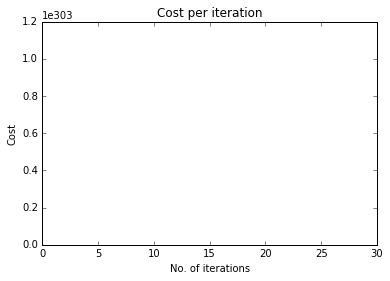

In [25]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.xlim(0,30)
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

## Plot line of best fit
 

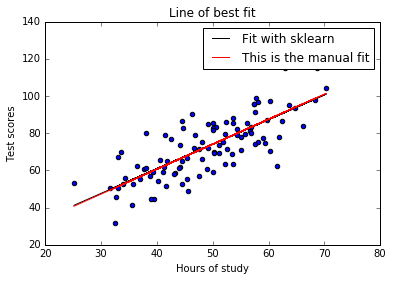

In [22]:
#Plot dataset
x = hours
y = scores
plt.scatter(x, y)
#Predict y values
pred = m * x + b
plt.plot(x, model.coef_*x + model.intercept_, 'k-', label = 'Fit with sklearn')
#Plot predictions as line of best fit
plt.plot(x, pred, c='r', label = 'This is the manual fit')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.legend()
plt.show()

### Which one is better?

#### Covariance between two vectors

In [ ]:
1/len(hours)*np.sum((hours - np.mean(hours))*(scores- np.mean(scores)))

#### Can also use the np.cov function

In [ ]:
np.cov(hours,scores)[0,1]

The full covariance matrix provides info about the self covariances (aka variances, on diagonal) and cross covariances:

In [ ]:
np.cov(hours,scores) #

In [ ]:
np.var(hours), np.var(scores)

#### If you divide by the standard deviation of both (so they are on the same scale), you get the Pearson correlation coefficient (normalized between 1 and -1)

In [ ]:
np.cov(hours,scores)[0,1]/(np.std(hours)*np.std(scores))

In [ ]:
np.corrcoef(hours,scores)

#### Slope of the best fit in relation to rho

In [ ]:
np.cov(hours,scores)[0,1]/(np.std(hours))**2